# Exercises A: Solutions
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

### Exercise 1
Create a function which takes a vector $v=(v_1, \dots ,v_n)$ and returns the Vandermonde matrix $V$:
$$
V = \left(\begin{array}{ccccc}
1 & v_1 & v_1^2 & \dots & v_1^{n-1}\\
1 & v_2 & v_2^2 & \dots & v_2^{n-1}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & v_n & v_n^2 & \dots & v_n^{n-1}\\
\end{array} \right)
$$

In [1]:
import numpy as np


def vandermonde(v):
    n = len(v)
    x = v
    w = np.arange(n)
    y = w
    for i in range(n - 1):
        v = np.append(v, x)
        w = np.append(w, y)
    v_mat = v.reshape((n, n)).T
    b_mat = w.reshape((n, n))
    return v_mat**b_mat


def vandermonde2(v):
    n = len(v)
    x = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            x[i, j] = v[i]**j
    return x


def vandermonde3(v):
    n = len(v)
    x = []
    for i in v:
        for j in range(n):  # [0, 1, 2, 3]
            x.append(i**j)
    x = np.array(x)
    x.resize((n, n))
    return x


v = np.array([1, 2, 3, 4])
vandermonde3(v)

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27],
       [ 1,  4, 16, 64]])

### Exercise 2

Create a function which takes a vector $v=(v_1, \dots ,v_n)$ and returns the mean and the sum of the vector.

1. Solve the task by using NumPy.
2. Solve the task without importing modules.

In [2]:
# 1
import numpy as np


def mean_sum(v):
    return v.mean(), v.sum()


y = np.array([1, 2, 3, 4])
mean_sum(y)

(2.5, 10)

In [3]:
# 2
y = [1, 2, 3, 4]


def sum_mean(v):
    x = 0
    for i in v:
        x += i
    return x / len(v), x


sum_mean(y)

(2.5, 10)

### Exercise 3

Use NumPy to check if the following vectors are linearly independent:

$$
v_1=
\left( \begin{array}{c} 0 \\ 1 \\ 2 \\ 1 \end{array} \right),
\ v_2=
\left( \begin{array}{c} 4 \\ 2 \\ 2 \\ 2 \end{array} \right),
\ v_3=
 \left( \begin{array}{c} 1 \\ 0 \\ 3 \\  0\end{array} \right),
\ v_4=
 \left( \begin{array}{c} 1 \\ 0 \\ 0 \\ 0 \end{array} \right).
$$

In [4]:
import numpy.linalg as nplin

m = np.array([[0, 4, 1, 1], [1, 2, 0, 0], [2, 2, 3, 0], [1, 2, 0, 0]])
print(m)

if nplin.det(m) != 0:
    print("Vectors are linearly independent.")
else:
    print("Vectors are linearly dependent.")

# Vectors are not linearly independent

[[0 4 1 1]
 [1 2 0 0]
 [2 2 3 0]
 [1 2 0 0]]
Vectors are linearly dependent.


### Exercise 4

Create a function which sorts the vector $v=(v_1, \dots ,v_n)$ without using the built-in `array.sort()` function and visualize the result in a graph.

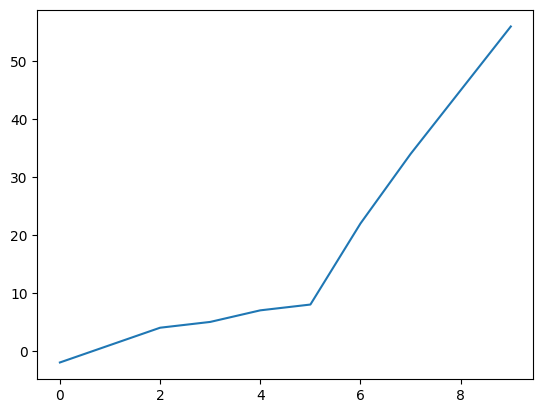

In [5]:

import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([4, 7, 22, 56, 8, -2, 34, 1, 5, 45])


def bubblesort(v):
    for k in range(len(v)-1, 0, -1):
        for i in range(k):
            if v[i] > v[i+1]:
                v[i], v[i+1] = v[i+1], v[i]
    return v


plt.plot(bubblesort(v))

### Exercise 5

Determine the intersection of the straight line $g$ and the plane $E$:

$$g: \vec{x}=\left ( \begin{array}{c} 2 \\ 3 \\ 0 \end{array} \right) +t\left ( \begin{array}{c} 1 \\ -2 \\ 2 \end{array} \right), \quad t \in \mathbb{R},$$
$$E: \vec{x}= \left ( \begin{array}{c} 9 \\ 0 \\ 0 \end{array} \right) + r\left ( \begin{array}{c} -9 \\ 4.5 \\ 0 \end{array} \right) +s\left ( \begin{array}{c} -9 \\ 0 \\ 4.5 \end{array} \right), \quad r,s\in \mathbb{R}.$$

_Hint: You might want to refresh your knowledge of the parametric form at, for example,_ https://en.wikipedia.org/wiki/Line-plane_intersection.

In [6]:
import numpy.linalg as nplin

# defining matrices
g = np.array([[2, 1],
              [3, -2],
              [0, 2]])
e = np.array([[9, -9, -9],
              [0, 4.5, 0],
              [0, 0, 4.5]])

# form system of linear equations: Ax = b
b = g[:, 0] - e[:, 0]
a = np.column_stack([-g[:, 1], e[:, 1:]])

# solve system for x
x = nplin.solve(a, b)
x

array([1.        , 0.22222222, 0.44444444])

### Exercise 6: Sorting algorithms

Sorting algorithms are algorithms that put elements of a list in a certain order. Efficient sorting is important for optimizing the efficiency of complex algorithms. There are different sorting algorithms which differ in time complexity.

1. Implement a function which uses _Bubblesort_ to sort a randomly generated list (numbers) in numerical order.
2. Implement a function which uses _Quicksort_ achieve the same goal.

_Hint: Inform yourself about the two different sorting algorithms first, for example,_
https://en.wikipedia.org/wiki/Bubble_sort _and_ https://en.wikipedia.org/wiki/Quicksort.

In [7]:
import random

numbers = []
for i in range(100):
    numbers.append(random.randint(-10000, 10000))


# 1
def bubblesort(numbers):
    n = len(numbers)
    for i in range(n):
        for j in range(0, n-i-1):
            if numbers[j] > numbers[j+1]:
                numbers[j], numbers[j+1] = numbers[j+1], numbers[j]
    return numbers


bubblesort(numbers)

[-9757,
 -9639,
 -9579,
 -9543,
 -9279,
 -9154,
 -9149,
 -8986,
 -8960,
 -8782,
 -8749,
 -8679,
 -8642,
 -8617,
 -7856,
 -7614,
 -7597,
 -7573,
 -7252,
 -7136,
 -7124,
 -6983,
 -6814,
 -6524,
 -6295,
 -6211,
 -5539,
 -5364,
 -5230,
 -4918,
 -4619,
 -4031,
 -3954,
 -3795,
 -3757,
 -3489,
 -3355,
 -3240,
 -2910,
 -2723,
 -2431,
 -2406,
 -2298,
 -2188,
 -2148,
 -2109,
 -1950,
 -1448,
 -1221,
 -664,
 -576,
 -526,
 -512,
 -472,
 -171,
 1124,
 1142,
 1253,
 1328,
 1349,
 1390,
 1557,
 1742,
 1808,
 2058,
 2763,
 3086,
 3446,
 3767,
 3873,
 4178,
 4366,
 4704,
 4845,
 5078,
 5115,
 5284,
 5304,
 5315,
 5361,
 5507,
 5582,
 5907,
 6449,
 6580,
 6701,
 6826,
 7081,
 7252,
 7276,
 7625,
 7801,
 8076,
 8133,
 8207,
 8333,
 8429,
 8491,
 8606,
 9719]

In [8]:
# 2
def partition(numbers, low, high):
    i = low - 1
    pivot = numbers[high]

    for j in range(low, high):
        if numbers[j] <= pivot:
            i += 1
            numbers[i], numbers[j] = numbers[j], numbers[i]
    numbers[i+1], numbers[high] = numbers[high], numbers[i+1]
    return i + 1


def quicksort(numbers, low, high):
    if low < high:
        p = partition(numbers, low, high)
        quicksort(numbers, low, p-1)
        quicksort(numbers, p+1, high)
    return numbers


quicksort(numbers, 0, len(numbers) - 1)

[-9757,
 -9639,
 -9579,
 -9543,
 -9279,
 -9154,
 -9149,
 -8986,
 -8960,
 -8782,
 -8749,
 -8679,
 -8642,
 -8617,
 -7856,
 -7614,
 -7597,
 -7573,
 -7252,
 -7136,
 -7124,
 -6983,
 -6814,
 -6524,
 -6295,
 -6211,
 -5539,
 -5364,
 -5230,
 -4918,
 -4619,
 -4031,
 -3954,
 -3795,
 -3757,
 -3489,
 -3355,
 -3240,
 -2910,
 -2723,
 -2431,
 -2406,
 -2298,
 -2188,
 -2148,
 -2109,
 -1950,
 -1448,
 -1221,
 -664,
 -576,
 -526,
 -512,
 -472,
 -171,
 1124,
 1142,
 1253,
 1328,
 1349,
 1390,
 1557,
 1742,
 1808,
 2058,
 2763,
 3086,
 3446,
 3767,
 3873,
 4178,
 4366,
 4704,
 4845,
 5078,
 5115,
 5284,
 5304,
 5315,
 5361,
 5507,
 5582,
 5907,
 6449,
 6580,
 6701,
 6826,
 7081,
 7252,
 7276,
 7625,
 7801,
 8076,
 8133,
 8207,
 8333,
 8429,
 8491,
 8606,
 9719]

### Exercise 7: Numerical differentiation

1. Create a function which estimates the derivative of the function $f$ at the position $x=3$. You can use the simple finite difference formula:

    $$
    f'(x)=\lim_{h \rightarrow 0} \dfrac{f(x+h) - f(x)}{h}
    $$

    The derivative function in Python should take the function to be derived, the position $x$ and the distance $h$ as arguments.


2. Create a function which estimates the gradient of a scalar function $g: \mathbb{R}^{n}\rightarrow \mathbb{R}$. The arguments of the gradient function should be the function $g$, the dimension $n$, the vector $v$ where the gradient shall be estimated and the distance $h$. Check your gradient function on the given function $g$ and vector $v$.

3. Create a function which returns an approximation of the Hessian matrix $h$ of the function $g$ at $v$:
  $$
  H_{g}(v) := \left( \dfrac{\partial^{2} g}{\partial v_{i} \partial v_{j}} (v) \right)_{i, j=1, \ldots, n}
  $$
  You can use the following identity:
  $$
  \dfrac{\partial}{\partial y}\left(\dfrac{\partial g}{\partial x}\right)(v) =\lim_{h \rightarrow 0}\dfrac{\dfrac{\partial g}{\partial x}(x, y+h, z)-\dfrac{\partial g}{\partial x}(x, y, z)}{h}\\
 =\lim_{h \rightarrow 0} \dfrac{\dfrac{g(x+h,y+h,z)-g(x,y+h,z)}{h}-\dfrac{g(x+h, y, z)-g(x, y, z)}{h}}{h}\\
 =\lim_{h \rightarrow 0}\dfrac{g(x+h, y+h, z)-g(x, y+h, z)-g(x+h, y, z)+g(x, y, z)}{h^{2}}
  $$

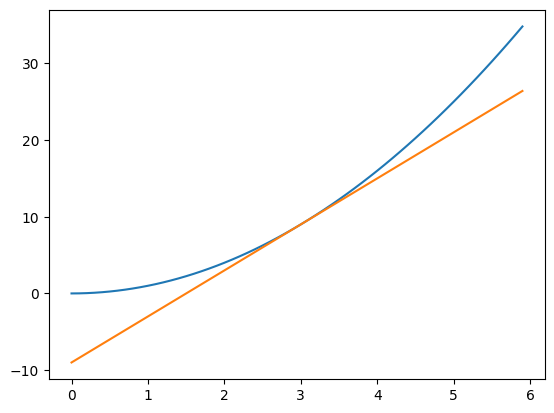

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**2


# 1
def derivation(f, x, h):
    return (f(x + h) - f(x)) / h


t = np.arange(0., 6., 0.1)
plt.plot(t, f(t), t, derivation(f, 3, 0.001) * t +
         (9 - derivation(f, 3, 0.001) * 3))

In [10]:
def g(v):
    return np.sin(v[0]) * v[1] + np.exp(v[2])


v = np.array([2., 3., 1.])


# 2
def gradient(g, v, h):
    n = len(v)
    grad = np.empty(n)
    for i in range(n):
        hv = v.copy()
        hv[i] += h
        grad[i] = (g(hv) - g(v)) / h
    return grad


gradient(g, v, 0.001)

array([-1.24980425,  0.90929743,  2.71964142])

In [11]:
# 3
def hessian(g, v, h):
    n = len(v)
    hes = np.empty([n, n])
    for i in range(n):
        for j in range(n):
            v1 = v.copy()
            v1[i] += h
            v2 = v1.copy()
            v2[j] += h
            v4 = v.copy()
            v4[j] += h
            hes[i][j] = (g(v2) - g(v1) - g(v4) + g(v)) / (h**2)
    return hes


hessian(g, v, 0.001)

array([[-2.72664225e+00, -4.16601416e-01,  0.00000000e+00],
       [-4.16601416e-01, -8.88178420e-10,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.72100170e+00]])

### Exercise 8: Numerical integration

Create a function to approximate an integral of the function $f$ in the interval $(a, b)$. You can divide the area into $n$ equal width rectangles and add these up by using the formula:
$$
\int_{a}^{b}f(x) \approx \dfrac{b-a}{n}\left(f(x_{1})+f(x_{2})+...+f(x_{n})\right)
$$
Where $x_{i}$ is given by $x_{i}=\dfrac{(b-a)}{n} \cdot i+a$.
Check your integral approximation on the given function $f$ in the interval (1,4).

In [12]:
def f(x):
    return x**3 + 2 * x**2 + 1


def integral(f, a, b, n):
    integral = 0
    for j in range(n):
        integral += f((b - a) / n * j + a)
    integral *= (b - a) / n
    return integral


integral(f, 1, 4, 100000)

108.74860500427451